In [91]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn as sk

In [92]:
# reading the dataset using pandas

df = pd.read_csv("./Prostate_Cancer - Prostate_Cancer.csv")

df.head()

,id,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,1,M,23,12,151,954,0.143,0.278,0.242,0.079
1,2,B,9,13,133,1326,0.143,0.079,0.181,0.057
2,3,M,21,27,130,1203,0.125,0.160,0.207,0.060
3,4,M,14,16,78,386,0.070,0.284,0.260,0.097
4,5,M,9,19,135,1297,0.141,0.133,0.181,0.059


In [93]:
# checking the type of data

df.dtypes

id                     int64
diagnosis_result      object
radius                 int64
texture                int64
perimeter              int64
area                   int64
smoothness           float64
compactness          float64
symmetry             float64
fractal_dimension    float64
dtype: object

In [94]:
# encoding our data using get dummies function
# converting categorical data to numerical

encoded_data = pd.get_dummies(df, prefix="diagnosis_result", drop_first=True, dtype=int)
encoded_data.head()

,id,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension,diagnosis_result_M
0,1,23,12,151,954,0.143,0.278,0.242,0.079,1
1,2,9,13,133,1326,0.143,0.079,0.181,0.057,0
2,3,21,27,130,1203,0.125,0.160,0.207,0.060,1
3,4,14,16,78,386,0.070,0.284,0.260,0.097,1
4,5,9,19,135,1297,0.141,0.133,0.181,0.059,1


In [95]:
# checking if there are null or nan data (missing data)
encoded_data.isna().sum()

id                    0
radius                0
texture               0
perimeter             0
area                  0
smoothness            0
compactness           0
symmetry              0
fractal_dimension     0
diagnosis_result_M    0
dtype: int64

# feature selection

In [96]:
"""
Correlation indicates the eXtent to which two or more variables fluctuate together. The value of correlation is scaled, within -1 to 1. The closer to 1 the more powerful the connection between the two variables, the lower the relationship closer to 0.
"""
encoded_data.corr()

# as we can see we can ignore fractal_dimension, texture

,id,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension,diagnosis_result_M
id,1.000000,0.047276,0.052263,-0.215953,-0.174354,-0.258328,-0.277554,-0.222334,-0.164946,-0.316889
radius,0.047276,1.000000,0.100245,-0.238216,-0.250934,-0.127121,-0.191490,-0.039707,-0.029120,-0.176967
texture,0.052263,0.100245,1.000000,-0.113453,-0.113725,0.102321,0.032446,0.077912,0.139157,0.070735
perimeter,-0.215953,-0.238216,-0.113453,1.000000,0.976648,0.269442,0.527542,0.195539,-0.195434,0.607498
area,-0.174354,-0.250934,-0.113725,0.976648,1.000000,0.208438,0.424950,0.110435,-0.274344,0.562444
smoothness,-0.258328,-0.127121,0.102321,0.269442,0.208438,1.000000,0.465723,0.424203,0.369580,0.197616
compactness,-0.277554,-0.191490,0.032446,0.527542,0.424950,0.465723,1.000000,0.681123,0.647953,0.512234
symmetry,-0.222334,-0.039707,0.077912,0.195539,0.110435,0.424203,0.681123,1.000000,0.568608,0.233028
fractal_dimension,-0.164946,-0.029120,0.139157,-0.195434,-0.274344,0.369580,0.647953,0.568608,1.000000,0.008180
diagnosis_result_M,-0.316889,-0.176967,0.070735,0.607498,0.562444,0.197616,0.512234,0.233028,0.008180,1.000000


In [97]:
# splitting our data
# as we know that the id can't consider as a feature for our model
X = encoded_data.drop(["id", "texture", "fractal_dimension", "diagnosis_result_M"], axis = 1)
X.head()

,radius,perimeter,area,smoothness,compactness,symmetry
0,23,151,954,0.143,0.278,0.242
1,9,133,1326,0.143,0.079,0.181
2,21,130,1203,0.125,0.160,0.207
3,14,78,386,0.070,0.284,0.260
4,9,135,1297,0.141,0.133,0.181


In [98]:
y = encoded_data["diagnosis_result_M"]
y.head()

0    1
1    0
2    1
3    1
4    1
Name: diagnosis_result_M, dtype: int64

# outliers

In [99]:
# using sorting to check if there are outliers
X.describe()

# from the data by comparing min val and max val with mean
# outliers are in area, compactness and perimeter
# may be in symmetry and smoothness

,radius,perimeter,area,smoothness,compactness,symmetry
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,16.850000,96.780000,702.880000,0.102730,0.126700,0.193170
std,4.879094,23.676089,319.710895,0.014642,0.061144,0.030785
min,9.000000,52.000000,202.000000,0.070000,0.038000,0.135000
25%,12.000000,82.500000,476.750000,0.093500,0.080500,0.172000
50%,17.000000,94.000000,644.000000,0.102000,0.118500,0.190000
75%,21.000000,114.250000,917.000000,0.112000,0.157000,0.209000
max,25.000000,172.000000,1878.000000,0.143000,0.345000,0.304000


Text(0.5, 1.0, 'symmetry')

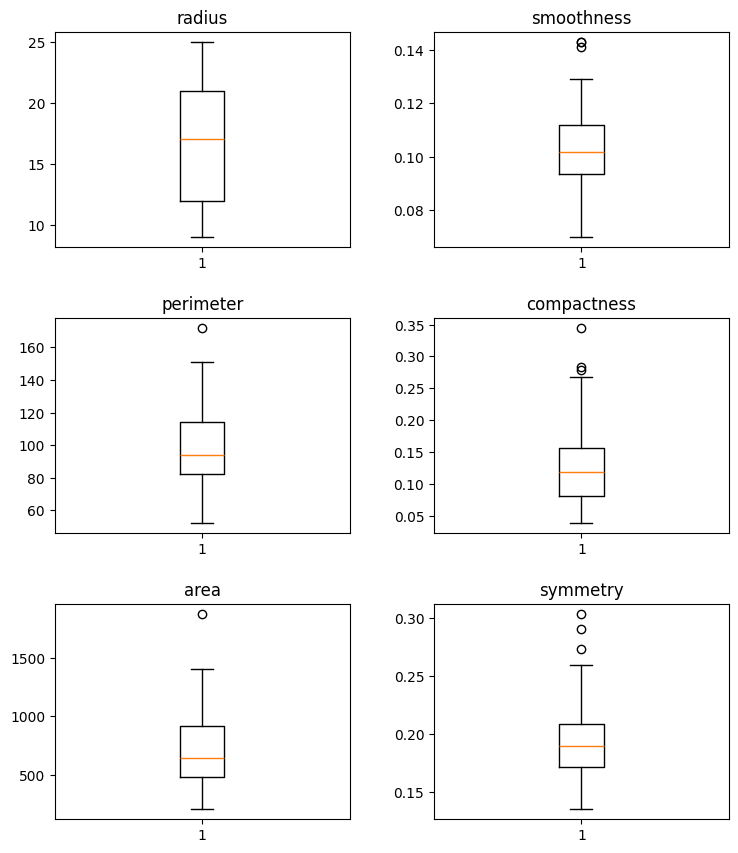

In [100]:
# checking outliers using box plot
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(8,9))
fig.tight_layout(pad=3) # for padding

axs[0, 0].boxplot(X["radius"])
axs[0, 0].set_title("radius")

axs[1, 0].boxplot(X["perimeter"])
axs[1, 0].set_title("perimeter")

axs[2, 0].boxplot(X["area"])
axs[2, 0].set_title("area")

axs[0, 1].boxplot(X["smoothness"])
axs[0, 1].set_title("smoothness")

axs[1, 1].boxplot(X["compactness"])
axs[1, 1].set_title("compactness")

axs[2, 1].boxplot(X["symmetry"])
axs[2, 1].set_title("symmetry")


In [101]:
# a function to detect outliers using IQR
def detect_upper_fence(data):
    upper_fence_list = []
    for col in data.columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)

        IQR = Q3 - Q1
        upper_fence = Q3 + 1.5 * IQR
        upper_fence_list.append(upper_fence)

    return upper_fence_list

limit = detect_upper_fence(X.drop("radius", axis=1))
limit

[161.875, 1577.375, 0.13975, 0.27175, 0.2645]

In [102]:
# a function that replaces outliers with median values
def replace_outliers(data, limit):
    for value in data:
        if (value > limit):
            data = data.replace([value], data.median())

    return data

In [103]:
# apply replace function
count = 0
for col in X.drop("radius", axis=1):
    X[col] = replace_outliers(X[col], limit[count])
    count += 1

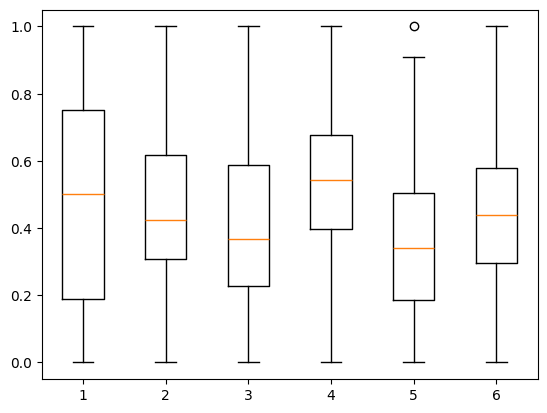

,radius,perimeter,area,smoothness,compactness,symmetry
0,0.8750,1.000000,0.625624,0.542373,0.351528,0.856
1,0.0000,0.818182,0.935108,0.542373,0.179039,0.368
2,0.7500,0.787879,0.832779,0.932203,0.532751,0.576
3,0.3125,0.262626,0.153078,0.000000,0.346070,1.000
4,0.0000,0.838384,0.910982,0.542373,0.414847,0.368


In [104]:
# normalize the data
X = (X - X.min()) / (X.max() - X.min())
plt.boxplot(X)
plt.show()
X.head()

# Sklearn

## KNN

In [105]:
# spliting the data into test and train 25% test
from sklearn.model_selection import train_test_split

# training our model
from sklearn.neighbors import KNeighborsClassifier

# confusion matrix and model efficiency
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import RadiusNeighborsClassifier

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2)

# fitting our data
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# predicting
y_pred = knn.predict(X_test)

y_pred


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0])

In [108]:
# classifier Results

print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

Accuracy = (cm[0,0]+ cm[1,1])/ (cm[0,0]+ cm[0,1] + cm[1,0]+ cm[1,1])
print("\nAccuracy: " + str(Accuracy)) # accuracy as a metric

Sensitivity = cm[1,1]/(cm[1,1] + cm[0,1])
print("\nSensitivity: " + str(Sensitivity))

Specificity = cm[0,0]/(cm[0,0] + cm[1,0])
print("\nSpecificity: " + str(Specificity))

Confusion Matrix:
[[ 5  1]
 [ 3 16]]

Accuracy: 0.84

Sensitivity: 0.9411764705882353

Specificity: 0.625


## RNN

In [110]:
rnn = RadiusNeighborsClassifier(radius=0.7)
rnn.fit(X_train, y_train)
y_pred2 = rnn.predict(X_test)

y_pred2

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0])

In [111]:
# confusion matrix and model efficiency

print("Confusion Matrix:")
cm2 = confusion_matrix(y_test, y_pred2)
print(cm2)

Accuracy = (cm2[0,0]+ cm2[1,1])/ (cm2[0,0]+ cm2[0,1] + cm2[1,0]+ cm2[1,1])
print("\nAccuracy: " + str(Accuracy)) # accuracy as a metric

Sensitivity = cm2[1,1]/(cm2[1,1] + cm2[0,1])
print("\nSensitivity: " + str(Sensitivity))

Specificity = cm2[0,0]/(cm2[0,0] + cm2[1,0])
print("\nSpecificity: " + str(Specificity))

Confusion Matrix:
[[ 5  1]
 [ 4 15]]

Accuracy: 0.8

Sensitivity: 0.9375

Specificity: 0.5555555555555556


# From Scratch

## KNN

In [112]:
# calculates the Euclidean distance
def euclidean_distance(x_new, x_old):
    return np.sqrt(np.sum((x_new - x_old) ** 2))

def knn_predict(X_train, y_train, X_test, k):
    y_pred = []
    for i in range(len(X_test)):
        distances = []
        for j in range(len(X_train)):
            dist = euclidean_distance(X_test.iloc[i], X_train.iloc[j])
            distances.append((dist, y_train.iloc[j]))

        # sort based on the first element (the distance)
        distances.sort(key=lambda x: x[0])

        k_nearest_labels = [label for (value, label) in distances[:k]]
        most_common = max(set(k_nearest_labels), key=k_nearest_labels.count)
        y_pred.append(most_common)
    return y_pred

In [115]:
y_pred3 = knn_predict(X_train, y_train, X_test, 5)
y_pred3

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0]

In [125]:
# Confusion matrix from scratch
def confusion_scratch(y_test, y_pred):

    # Initialize counters
    count_00 = count_01 = count_10 = count_11 = 0

    for i in range(len(y_test)):
        if y_test[i] == y_pred[i]:
            if y_test[i] == 0:
                count_00 += 1
            else:
                count_11 += 1
        elif y_test[i] == 1:
            count_10 += 1
        else:
            count_01 += 1
    matrix = np.array([[count_00, count_01], [count_10, count_11]])
    return matrix

In [126]:
print("Confusion Matrix:")
cm3 = confusion_scratch(y_test.tolist(), y_pred2)
print(cm3)

Accuracy = (cm3[0,0]+ cm3[1,1])/ (cm3[0,0]+ cm3[0,1] + cm3[1,0]+ cm3[1,1])
print("\nAccuracy: " + str(Accuracy)) # accuracy as a metric

Sensitivity = cm3[1,1]/(cm3[1,1] + cm3[0,1])
print("\nSensitivity: " + str(Sensitivity))

Specificity = cm3[0,0]/(cm3[0,0] + cm3[1,0])
print("\nSpecificity: " + str(Specificity))

Confusion Matrix:
[[ 5  1]
 [ 4 15]]

Accuracy: 0.8

Sensitivity: 0.9375

Specificity: 0.5555555555555556


## RNN

In [121]:
def rnn_predict(X_train, y_train, X_test, r):
    y_pred = []
    for i in range(len(X_test)):
        distances = []
        for j in range(len(X_train)):
            dist = euclidean_distance(X_test.iloc[i], X_train.iloc[j])
            if (dist <= r):
                distances.append((dist, y_train.iloc[j]))

        r_nearest_labels = [label for (value, label) in distances]
        most_common = max(set(r_nearest_labels), key=r_nearest_labels.count)
        y_pred.append(most_common)
    return y_pred

In [123]:
y_pred4 = rnn_predict(X_train, y_train, X_test, 0.7)
y_pred4

[1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0]

In [124]:
print("Confusion Matrix:")
cm4 = confusion_scratch(y_test.tolist(), y_pred4)
print(cm4)

Accuracy = (cm4[0,0]+ cm4[1,1])/ (cm4[0,0]+ cm4[0,1] + cm4[1,0]+ cm4[1,1])
print("\nAccuracy: " + str(Accuracy)) # accuracy as a metric

Sensitivity = cm4[1,1]/(cm4[1,1] + cm4[0,1])
print("\nSensitivity: " + str(Sensitivity))

Specificity = cm4[0,0]/(cm4[0,0] + cm4[1,0])
print("\nSpecificity: " + str(Specificity))

Confusion Matrix:
[[ 5  1]
 [ 4 15]]

Accuracy: 0.8

Sensitivity: 0.9375

Specificity: 0.5555555555555556
